In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('shopping_trends.csv')

df.rename(columns={ col: col.rstrip().replace(" ", "_").lower() for col in df.columns}, inplace=True)
df

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


Preferred Payment Methods: 



,Payment Method Count
preferred_payment_method,
Bank Transfer,612
Cash,670
Credit Card,671
Debit Card,636
PayPal,677
Venmo,634


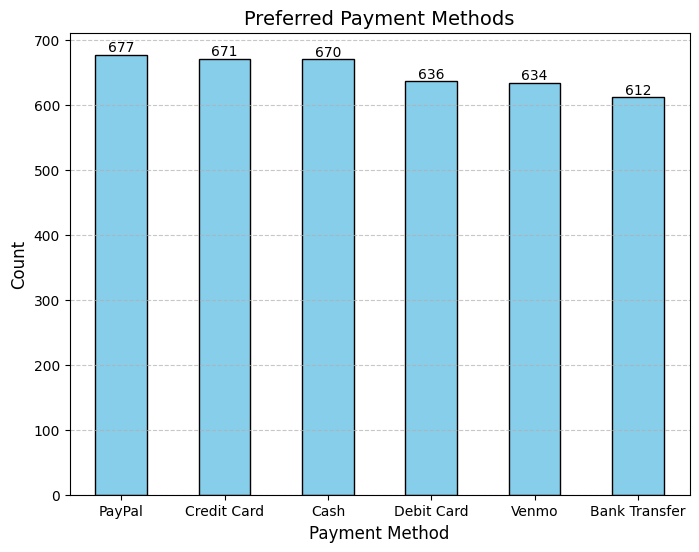

Preferred Payment Method by location: 



preferred_payment_method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo,Total
location,,,,,,,
Montana,21,21,9,18,14,13,96
California,7,16,19,17,20,16,95
Idaho,13,14,17,14,21,14,93
Illinois,11,20,12,10,11,28,92
Alabama,10,8,17,20,19,15,89


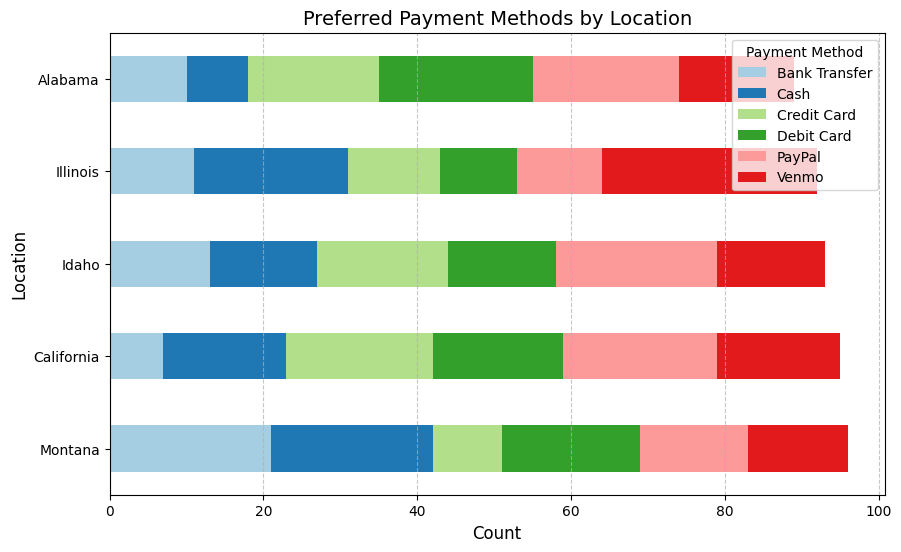

Preferred Payment Method by subscribers and nonsubscribers: 



subscription_status,No,Yes,Total
preferred_payment_method,,,
PayPal,497,180,677
Credit Card,492,179,671
Cash,497,173,670
Debit Card,446,190,636
Venmo,460,174,634
Bank Transfer,455,157,612


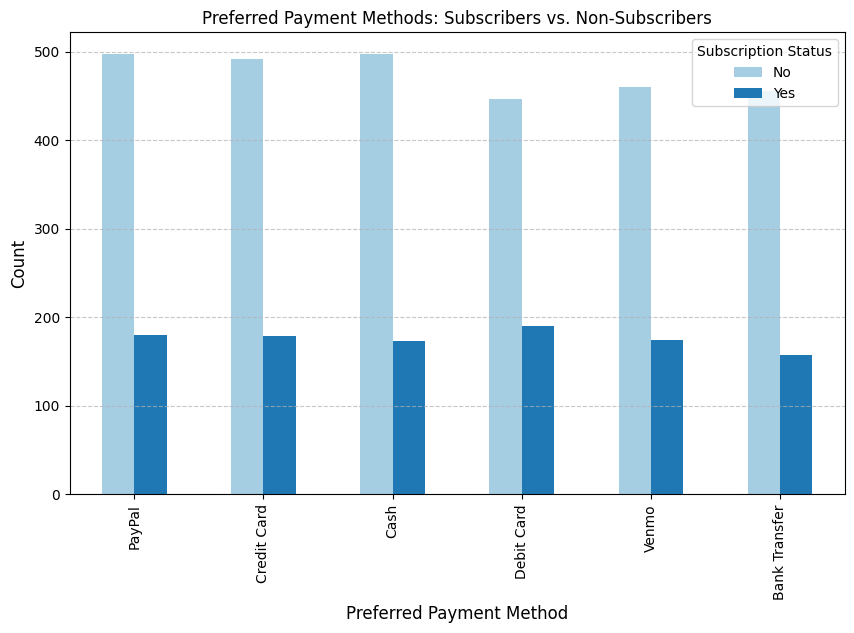

In [114]:
# Payment and Transaction Analysis:
# Preferred Payment Methods

# Pivot table for preferred payment methods
preferred_payment = df.pivot_table(index='preferred_payment_method', values='customer_id', aggfunc='count')
preferred_payment = preferred_payment.rename(columns={'customer_id':'Payment Method Count'})
print("Preferred Payment Methods: \n")
display(preferred_payment)
# Value counts for preferred payment methods
count = df['preferred_payment_method'].value_counts()
# Plotting the bar chart
ax = count.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
for i, value in enumerate(count):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
# Chart styling
plt.title('Preferred Payment Methods', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Preferred Payment Method by location: 



preferred_payment_method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo,Total
location,,,,,,,
Montana,21,21,9,18,14,13,96
California,7,16,19,17,20,16,95
Idaho,13,14,17,14,21,14,93
Illinois,11,20,12,10,11,28,92
Alabama,10,8,17,20,19,15,89


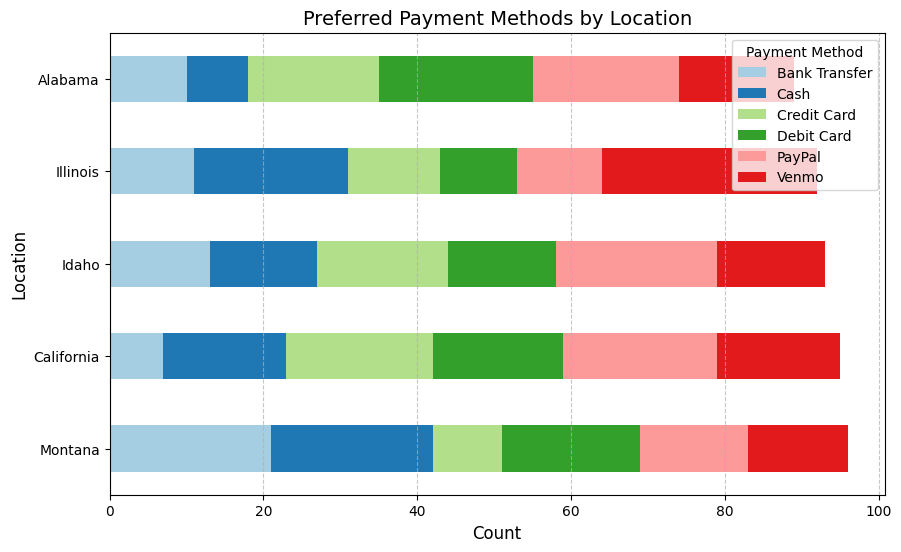

In [116]:
# Most popular payment methods overall and by location
pivot_table_1 = df.pivot_table(index='location', columns='preferred_payment_method', aggfunc='size')
pivot_table_1['Total'] = pivot_table_1.sum(axis=1)
pivot_table_1_sorted = pivot_table_1.sort_values(by='Total', ascending=False).head(5)
# Display the pivot table
print("Preferred Payment Method by location: \n")
display(pivot_table_1_sorted)
# Plotting the horizontal stacked bar chart
pivot_table_1_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 6), color=plt.cm.Paired.colors)
# Chart styling
plt.title('Preferred Payment Methods by Location', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.legend(title='Payment Method')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Preferred Payment Method by subscribers and nonsubscribers: 



subscription_status,No,Yes,Total
preferred_payment_method,,,
PayPal,497,180,677
Credit Card,492,179,671
Cash,497,173,670
Debit Card,446,190,636
Venmo,460,174,634
Bank Transfer,455,157,612


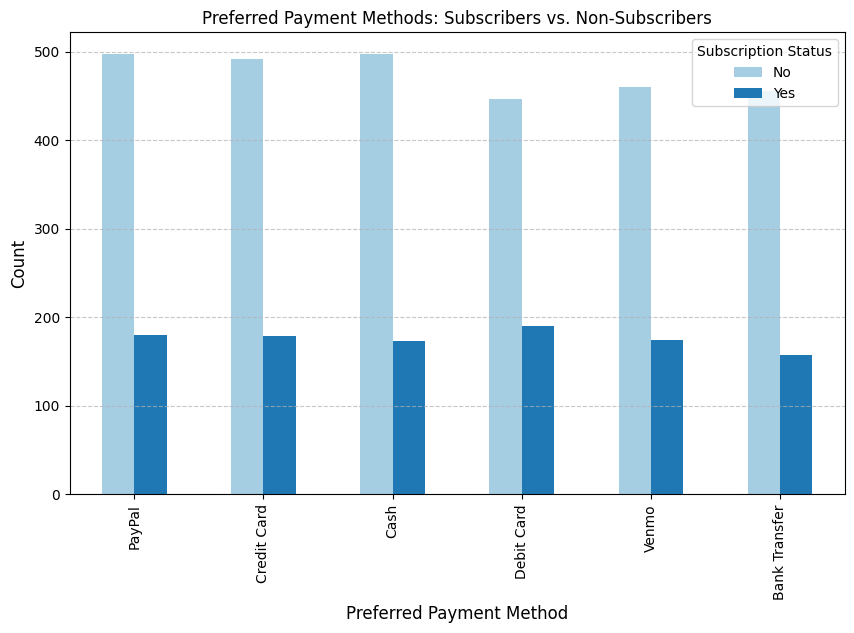

In [117]:
# How does preferred payment method vary between subscribers and non-subscribers?
pivot_table_2 = df.pivot_table(index='preferred_payment_method', columns='subscription_status', aggfunc='size')
pivot_table_2['Total'] = pivot_table_2.sum(axis=1)
pivot_table_2_sorted = pivot_table_2.sort_values(by='Total', ascending=False)
#Display the pivot table
print("Preferred Payment Method by subscribers and nonsubscribers: \n")
display(pivot_table_2_sorted)
# Plotting the bar chart for subscribers vs non-subscribers
pivot_table_2_sorted.drop(columns='Total').plot(kind='bar', figsize=(10, 6), color=plt.cm.Paired.colors)
# Chart styling
plt.title('Preferred Payment Methods: Subscribers vs. Non-Subscribers')
plt.xlabel('Preferred Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscription Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Payment and Purchase Behavior
# Do customers who use specific payment methods spend more or less per transaction?



# Is there a correlation between preferred payment methods and purchase frequency?